In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv(r"...\Salary_Data.csv")

## Exploring

In [3]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
print("#"*25, "df-info", "#"*25)
print(df.info())
print("#"*25, "df-describe", "#"*25)
print(df.describe())
print("#"*25, "df-shape", "#"*25)
print(df.shape)

######################### df-info #########################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB
None
######################### df-describe #########################
               Age  Years of Experience         Salary
count  6702.000000          6701.000000    6699.000000
mean     33.620859             8.094687  115326.964771
std       7.614633             6.059003   52786.183911
min      21.000000             0.000000     350.000000
25%      28.000000             3.000

In [5]:
null_rows = df[df.isnull().any(axis=1)]
null_rows

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
2011,27.0,Male,NaN,Developer,7.0,100000.0
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


In [6]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,6698.0,33.623022,7.615784,21.0,28.0,32.0,38.0,62.0
Years of Experience,6698.0,8.095178,6.060291,0.0,3.0,7.0,12.0,34.0
Salary,6698.0,115329.253061,52789.792507,350.0,70000.0,115000.0,160000.0,250000.0


In [8]:
df.loc[df["Salary"] < 1000]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
259,29.0,Male,Bachelor's,Junior Business Operations Analyst,1.5,350.0
1890,25.0,Female,Bachelor's Degree,Front end Developer,1.0,550.0
2654,23.0,Male,PhD,Software Engineer Manager,1.0,579.0
4633,31.0,Female,Bachelor's Degree,Junior HR Coordinator,4.0,500.0


In [9]:
df = df.drop(df.loc[df["Salary"] < 1000].index)

In [10]:
df.loc[df["Salary"] < 1000]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


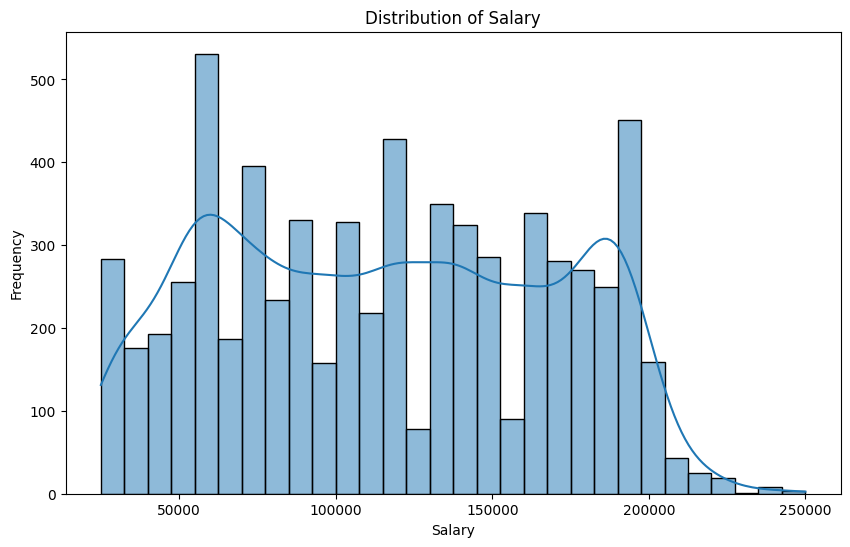

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], bins=30, kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

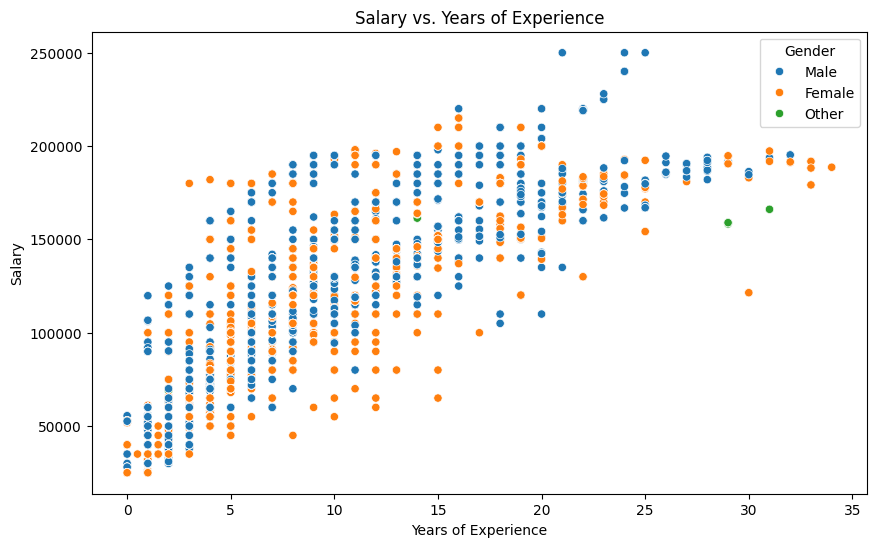

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Years of Experience', y='Salary', hue='Gender', data=df)
plt.title('Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

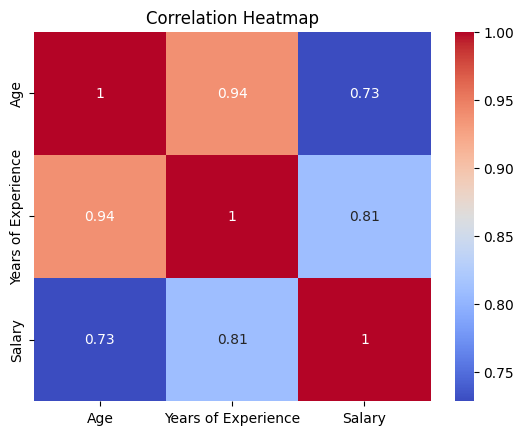

In [14]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
""" corr_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show() """

' corr_matrix = df.corr(numeric_only=True)\nmask = np.triu(np.ones_like(corr_matrix, dtype=bool))\nplt.figure(figsize=(10, 8))\nsns.heatmap(corr_matrix, mask=mask, annot=True, cmap=\'coolwarm\', vmin=-1, vmax=1, fmt=".2f")\nplt.title(\'Correlation Heatmap\', fontsize=16)\nplt.show() '

---
---

## Model training

In [16]:
numeric_cols = df.select_dtypes(include=["float64"])
numeric_cols= numeric_cols.drop(columns=["Salary"])
num_cols = numeric_cols.columns
num_cols

Index(['Age', 'Years of Experience'], dtype='object')

In [17]:
from sklearn.model_selection import train_test_split

X = df[num_cols]
Y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Age,6694.0,33.63,7.62,21.0,28.0,32.0,38.0,62.0
Years of Experience,6694.0,8.10,6.06,0.0,3.0,7.0,12.0,34.0
Salary,6694.0,115397.87,52730.84,25000.0,70000.0,115000.0,160000.0,250000.0


## Model Summary
- 'Age' ve 'Years of Experience'a göre model

In [19]:
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()

print(model_sm.summary())

intercept = model.intercept_
print("\n#OOO# İntercept is : ", intercept.round(2))

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     5269.
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:46:37   Log-Likelihood:                -62920.
No. Observations:                5355   AIC:                         1.258e+05
Df Residuals:                    5352   BIC:                         1.259e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 9.97e+04   3

In [20]:
X_train.head()

,Age,Years of Experience
2129,33.0,6.0
4170,37.0,10.0
3255,42.0,14.0
6649,36.0,10.0
1776,29.0,5.0


In [21]:
y_train.head()

2129    115000.0
4170    113000.0
3255    180000.0
6649    100000.0
1776    105000.0
Name: Salary, dtype: float64

yeni veri gelirse model nasıl performans göstericeğini simüle ediyo.

In [22]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)


print("#"*10, "TRAIN", "#"*10)
print(f'Train R^2: {train_r2:.5f}')
print(f'Train MAE: {train_mae:,.2f}')
print(f'Train MSE: {train_mse:,.2f}')
print("")
print("#"*10, "TEST", "#"*10)
print(f'Test R^2: {test_r2:.5f}')
print(f'Test MAE: {test_mae:,.2f}')
print(f'Test MSE: {test_mse:,.2f}')
print("")
print("#"*10, "Overfitting Control", "#"*10)
print(f"Linear Regression Test MSE - Train MSE Difference: {test_mse - train_mse:,.2f}")
print(f"Percentage Difference: {((test_mse - train_mse) / train_mse) * 100:.2f}%")

########## TRAIN ##########
Train R^2: 0.66317
Train MAE: 24,549.46
Train MSE: 940,381,642.44

########## TEST ##########
Test R^2: 0.65823
Test MAE: 24,256.89
Test MSE: 933,520,986.26

########## Overfitting Control ##########
Linear Regression Test MSE - Train MSE Difference: -6,860,656.19
Percentage Difference: -0.73%


In [23]:
""" # Manuel mse 
mse = 0
for i,j in zip(y_test,y_test_pred):
    mse += (i-j)**2/len(y_test)
    print(f"{i} - {j.round(2)} is :  {((i - j).round(2))}")
print("mse in test data is : ", mse.round(2)) """

' # Manuel mse \nmse = 0\nfor i,j in zip(y_test,y_test_pred):\n    mse += (i-j)**2/len(y_test)\n    print(f"{i} - {j.round(2)} is :  {((i - j).round(2))}")\nprint("mse in test data is : ", mse.round(2)) '

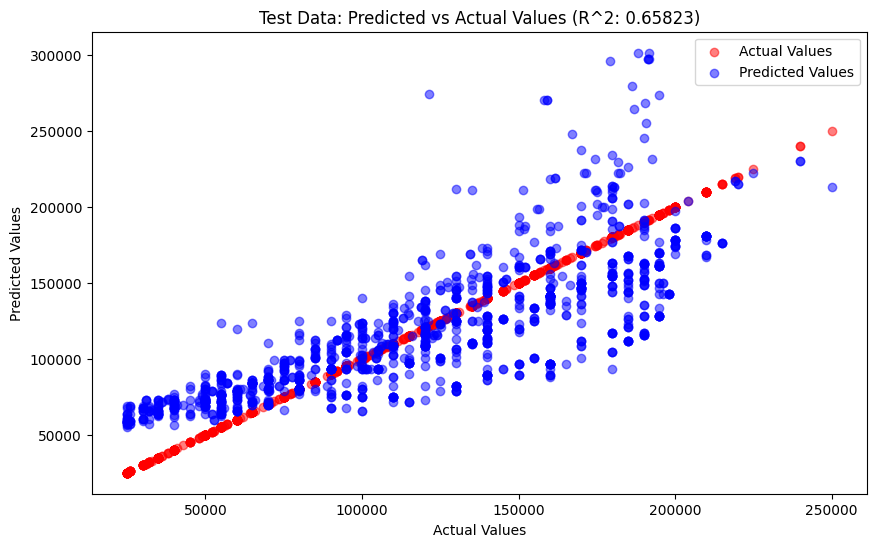

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, color='red',alpha=0.5, label='Actual Values')
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5, label='Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Test Data: Predicted vs Actual Values (R^2: {test_r2:.5f})')
plt.legend()
plt.show()

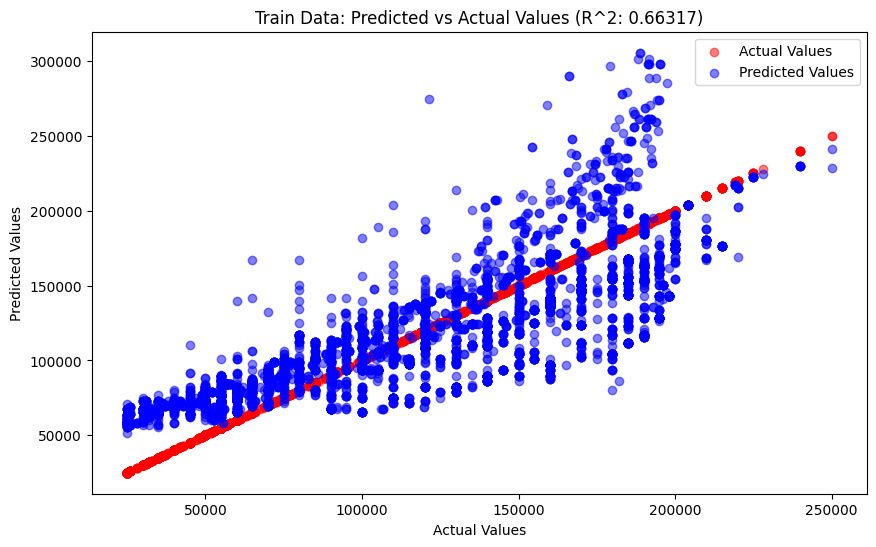

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train, color='red',alpha=0.5, label='Actual Values')
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Train Data: Predicted vs Actual Values (R^2: {train_r2:.5f})')
plt.legend()
plt.show()

---
---
---
---


### Şimdi Kategorik değişkenleri modele dahil edelim.


In [26]:
df.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 6694 entries, 0 to 6703
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           6694 non-null   object
 1   Education Level  6694 non-null   object
 2   Job Title        6694 non-null   object
dtypes: object(3)
memory usage: 209.2+ KB


In [27]:
df_cat = df.select_dtypes(include=["object"])
for col in df_cat.columns:
    print(f"########## ")
    print(df_cat[col].value_counts())

########## 
Gender
Male      3669
Female    3011
Other       14
Name: count, dtype: int64
########## 
Education Level
Bachelor's Degree    2263
Master's Degree      1572
PhD                  1367
Bachelor's            755
High School           448
Master's              288
phD                     1
Name: count, dtype: int64
########## 
Job Title
Software Engineer             518
Data Scientist                453
Software Engineer Manager     375
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: count, Length: 191, dtype: int64


"Education Level" için Label Encoding veya mapping yapıcaz 
"Gender" ve "Job Title" için One-Hot Encoding yapıcaz.

Label Encoding/Mapping sıralı, One-Hot Encoding sırasızlar için uygulanması daha doğru.

In [28]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


---
---

## "Education Level"'ı ekleme

In [29]:
df["Education Level"].value_counts()

Education Level
Bachelor's Degree    2263
Master's Degree      1572
PhD                  1367
Bachelor's            755
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

### Education Level Kısmında aynı olanlar :
- Bachlor's Degree = Bachelor's
- Master's Degree = Master's
- PhD = phD 

In [30]:
df["Education Level"] = df["Education Level"].replace({
    "Bachelor's": "Bachelor's Degree",
    "Master's": "Master's Degree",
    "phD": "PhD"
})

<Axes: xlabel='Education Level', ylabel='Salary'>

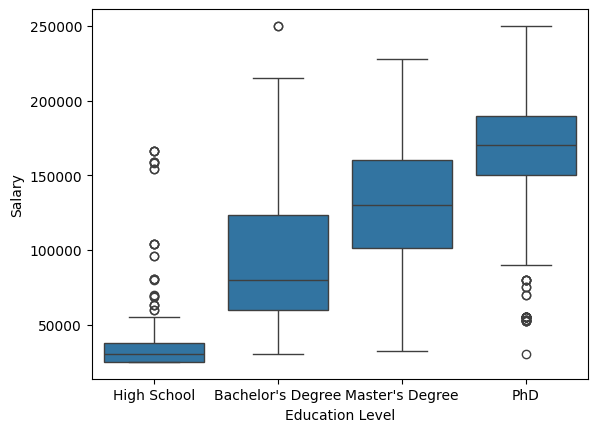

In [31]:
sns.boxplot(x='Education Level', y='Salary', data=df, order=["High School", "Bachelor's Degree", "Master's Degree", "PhD"])

In [32]:
print(df["Education Level"].value_counts())


Education Level
Bachelor's Degree    3018
Master's Degree      1860
PhD                  1368
High School           448
Name: count, dtype: int64


---

# Label Encoder VS Mapping 

Label Encoder

In [33]:
from sklearn.preprocessing import LabelEncoder

df['Education Level Encoded'] = LabelEncoder().fit_transform(df['Education Level'])

df[['Education Level','Education Level Encoded']].groupby("Education Level").value_counts()

Education Level    Education Level Encoded
Bachelor's Degree  0                          3018
High School        1                           448
Master's Degree    2                          1860
PhD                3                          1368
Name: count, dtype: int64

- Label Encoder Alfabetik yaptığından el classicco Mapping yapıcaz.

* Label Encoder

In [34]:
numeric_cols = df.select_dtypes(include=["float64", "int32", "int64"])
numeric_cols= numeric_cols.drop(columns=["Salary"])
num_cols = numeric_cols.columns

In [35]:
print(num_cols)
Y = df["Salary"]
X = df[num_cols]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()

print(model_sm.summary())

intercept = model.intercept_
print("")
print("#"*35)
print("#OOO# İntercept is : ", intercept.round(2))

Index(['Age', 'Years of Experience', 'Education Level Encoded'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     3740.
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:46:38   Log-Likelihood:                -62808.
No. Observations:                5355   AIC:                         1.256e+05
Df Residuals:                    5351   BIC:                         1.256e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [36]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("#"*10, "TRAIN", "#"*10)
print(f'Train R^2: {train_r2:.5f}')
print(f'Train MAE: {train_mae:,.2f}')
print(f'Train MSE: {train_mse:,.2f}')
print("")
print("#"*10, "TEST", "#"*10)
print(f'Test R^2: {test_r2:.5f}')
print(f'Test MAE: {test_mae:,.2f}')
print(f'Test MSE: {test_mse:,.2f}')
print("")
print("#"*10, "Overfitting Control", "#"*10)
print(f"Linear Regression Test MSE - Train MSE Difference: {test_mse - train_mse:,.2f}")
print(f"Percentage Difference: {((test_mse - train_mse) / train_mse) * 100:.2f}%")

########## TRAIN ##########
Train R^2: 0.67706
Train MAE: 23,801.18
Train MSE: 901,617,808.20

########## TEST ##########
Test R^2: 0.66527
Test MAE: 23,566.43
Test MSE: 914,309,127.87

########## Overfitting Control ##########
Linear Regression Test MSE - Train MSE Difference: 12,691,319.67
Percentage Difference: 1.41%


* Mapped

Mapping (Manuel numaralandırma)

Manuel numaralandırma, sıralı (ordinal) değişkenlerin sırasını modele doğru şekilde eklememize olanak sağlar. Ancak bu yöntem sınıflar arasındaki skalanın eşit olduğunu varsayar. Eğer sınıflar arasındaki farklar eşit değil ise (örneğin 0 ile 1 arasındaki fark, 2 ile 3 arasındaki farktan daha büyükse), yöntem beklendiği gibi doğru sonuç vermeyebilir.

Not: Değişkenleri 0,1,2,3 veya 1,2,3,4 olarak numaralandırmak, modelin r^2'sini arttırmaz veya azaltmaz.

In [37]:
education_order = {
    "High School": 0,
    "Bachelor's Degree": 1,
    "Master's Degree": 2,
    "PhD": 3
}

df['Education Level Mapped'] = df['Education Level'].map(education_order)
print(df[['Education Level', 'Education Level Mapped']].value_counts())

Education Level    Education Level Mapped
Bachelor's Degree  1                         3018
Master's Degree    2                         1860
PhD                3                         1368
High School        0                          448
Name: count, dtype: int64


In [38]:
numeric_cols = df.select_dtypes(include=["float64", "int32", "int64"])
numeric_cols= numeric_cols.drop(columns=["Salary", "Education Level Encoded"])
num_cols = numeric_cols.columns

In [39]:
print(num_cols)
Y = df["Salary"]
X = df[num_cols]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()

print(model_sm.summary())

intercept = model.intercept_
print("")
print("#"*35)
print("#OOO# İntercept is : ", intercept.round(2))

Index(['Age', 'Years of Experience', 'Education Level Mapped'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     4281.
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:46:38   Log-Likelihood:                -62557.
No. Observations:                5355   AIC:                         1.251e+05
Df Residuals:                    5351   BIC:                         1.251e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [40]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("#"*10, "TRAIN", "#"*10)
print(f'Train R^2: {train_r2:.5f}')
print(f'Train MAE: {train_mae:,.2f}')
print(f'Train MSE: {train_mse:,.2f}')
print("")
print("#"*10, "TEST", "#"*10)
print(f'Test R^2: {test_r2:.5f}')
print(f'Test MAE: {test_mae:,.2f}')
print(f'Test MSE: {test_mse:,.2f}')
print("")
print("#"*10, "Overfitting Control", "#"*10)
print(f"Linear Regression Test MSE - Train MSE Difference: {test_mse - train_mse:,.2f}")
print(f"Percentage Difference: {((test_mse - train_mse) / train_mse) * 100:.2f}%")

########## TRAIN ##########
Train R^2: 0.70587
Train MAE: 22,396.76
Train MSE: 821,173,174.85

########## TEST ##########
Test R^2: 0.69485
Test MAE: 22,060.59
Test MSE: 833,491,495.76

########## Overfitting Control ##########
Linear Regression Test MSE - Train MSE Difference: 12,318,320.91
Percentage Difference: 1.50%


### "Education Level Mapped" Kazandı.
Çünkü Education Level ordinal bir değişkendi. Fakat label encode bu değişkenlerin içeriğini alfabetik olarak 0 1 2 3... şeklinde numaralandırıyordu. Biz mapping ile ordinal düzende numaralandırdığımız için Lineer Modele daha uygun bir bilgi sağlamış oldu. 

---
---

## One Hot Encoding drop_first = True vs False

In [41]:
df1 = df.drop(columns=['Education Level Encoded', 'Education Level Mapped'])
df1.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [42]:
from sklearn.preprocessing import OneHotEncoder


df_encoded = pd.get_dummies(df1, columns=["Education Level"], prefix="Education", drop_first=False, dtype=int)
df_encoded_dropped = pd.get_dummies(df1, columns=["Education Level"], prefix="Education", drop_first=True, dtype=int)


df_encoded.head()

,Age,Gender,Job Title,Years of Experience,Salary,Education_Bachelor's Degree,Education_High School,Education_Master's Degree,Education_PhD
0,32.0,Male,Software Engineer,5.0,90000.0,1,0,0,0
1,28.0,Female,Data Analyst,3.0,65000.0,0,0,1,0
2,45.0,Male,Senior Manager,15.0,150000.0,0,0,0,1
3,36.0,Female,Sales Associate,7.0,60000.0,1,0,0,0
4,52.0,Male,Director,20.0,200000.0,0,0,1,0


In [43]:
df_encoded_dropped.head()

,Age,Gender,Job Title,Years of Experience,Salary,Education_High School,Education_Master's Degree,Education_PhD
0,32.0,Male,Software Engineer,5.0,90000.0,0,0,0
1,28.0,Female,Data Analyst,3.0,65000.0,0,1,0
2,45.0,Male,Senior Manager,15.0,150000.0,0,0,1
3,36.0,Female,Sales Associate,7.0,60000.0,0,0,0
4,52.0,Male,Director,20.0,200000.0,0,1,0


In [44]:
num_cols = df_encoded.select_dtypes(include=["int32", "float64"]).columns
num_cols = num_cols.drop("Salary")
num_cols

Index(['Age', 'Years of Experience', 'Education_Bachelor's Degree',
       'Education_High School', 'Education_Master's Degree', 'Education_PhD'],
      dtype='object')

* Droplanmamış model

In [45]:
print(num_cols)
print(f"Kullanılan sütun sayısı :{len(num_cols)} ")
Y = df_encoded["Salary"]
X = df_encoded[num_cols]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()

print(model_sm.summary())

intercept = model.intercept_
print("")
print("#"*35)
print("#OOO# İntercept is : ", intercept.round(2))

Index(['Age', 'Years of Experience', 'Education_Bachelor's Degree',
       'Education_High School', 'Education_Master's Degree', 'Education_PhD'],
      dtype='object')
Kullanılan sütun sayısı :6 
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     2691.
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:46:38   Log-Likelihood:                -62468.
No. Observations:                5355   AIC:                         1.249e+05
Df Residuals:                    5349   BIC:                         1.250e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
             

In [46]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("#"*10, "TRAIN", "#"*10)
print(f'Train R^2: {train_r2:.5f}')
print(f'Train MAE: {train_mae:,.2f}')
print(f'Train MSE: {train_mse:,.2f}')
print("")
print("#"*10, "TEST", "#"*10)
print(f'Test R^2: {test_r2:.5f}')
print(f'Test MAE: {test_mae:,.2f}')
print(f'Test MSE: {test_mse:,.2f}')
print("")
print("#"*10, "Overfitting Control", "#"*10)
print(f"Linear Regression Test MSE - Train MSE Difference: {test_mse - train_mse:,.2f}")
print(f"Percentage Difference: {((test_mse - train_mse) / train_mse) * 100:.2f}%")

########## TRAIN ##########
Train R^2: 0.71552
Train MAE: 22,113.21
Train MSE: 794,242,157.68

########## TEST ##########
Test R^2: 0.70970
Test MAE: 21,588.79
Test MSE: 792,946,639.20

########## Overfitting Control ##########
Linear Regression Test MSE - Train MSE Difference: -1,295,518.48
Percentage Difference: -0.16%


* Droplanmış Model

In [47]:
num_cols = df_encoded_dropped.select_dtypes(include=["int32", "float64"]).columns
num_cols = num_cols.drop("Salary")
num_cols

Index(['Age', 'Years of Experience', 'Education_High School',
       'Education_Master's Degree', 'Education_PhD'],
      dtype='object')

In [48]:
print(num_cols)
print(f"Kullanılan sütun sayısı :{len(num_cols)} ")
Y = df_encoded_dropped["Salary"]
X = df_encoded_dropped[num_cols]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()

print(model_sm.summary())

intercept = model.intercept_
print("")
print("#"*35)
print("#OOO# İntercept is : ", intercept.round(2))

Index(['Age', 'Years of Experience', 'Education_High School',
       'Education_Master's Degree', 'Education_PhD'],
      dtype='object')
Kullanılan sütun sayısı :5 
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     2691.
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:46:38   Log-Likelihood:                -62468.
No. Observations:                5355   AIC:                         1.249e+05
Df Residuals:                    5349   BIC:                         1.250e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                coef    std 

In [49]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("#"*10, "TRAIN", "#"*10)
print(f'Train R^2: {train_r2:.5f}')
print(f'Train MAE: {train_mae:,.2f}')
print(f'Train MSE: {train_mse:,.2f}')
print("")
print("#"*10, "TEST", "#"*10)
print(f'Test R^2: {test_r2:.5f}')
print(f'Test MAE: {test_mae:,.2f}')
print(f'Test MSE: {test_mse:,.2f}')
print("")
print("#"*10, "Overfitting Control", "#"*10)
print(f"Linear Regression Test MSE - Train MSE Difference: {test_mse - train_mse:,.2f}")
print(f"Percentage Difference: {((test_mse - train_mse) / train_mse) * 100:.2f}%")

########## TRAIN ##########
Train R^2: 0.71552
Train MAE: 22,113.21
Train MSE: 794,242,157.68

########## TEST ##########
Test R^2: 0.70970
Test MAE: 21,588.79
Test MSE: 792,946,639.20

########## Overfitting Control ##########
Linear Regression Test MSE - Train MSE Difference: -1,295,518.48
Percentage Difference: -0.16%


Bu kısımda'da df_encoded_dropped modelini kullanmamız daha uygun. Droplanmış modeli seçme sebebimiz, droplanmamış modelin istatistiksel summary kısmındada belirtildiği gibi, model yüksek çoklu doğrusallık problemi içermiyor.    

One Hot Encoder Dropped'ın r^2'si daha yüksek cıktı 

---
---
# Gender Ekleme 

In [50]:
df_encoded_dropped["Gender"].value_counts()

Gender
Male      3669
Female    3011
Other       14
Name: count, dtype: int64

multicollinearity yüzünden other sınıfını dropluyorum

In [51]:
df_encoded_dropped = df_encoded_dropped[df_encoded_dropped["Gender"] != "Other"]
df_encoded_dropped["Gender"].value_counts()

Gender
Male      3669
Female    3011
Name: count, dtype: int64

In [52]:
df_encoded_dropped = pd.get_dummies(df_encoded_dropped, columns=['Gender'], dtype=int, drop_first=True)
df_encoded_dropped.head()


,Age,Job Title,Years of Experience,Salary,Education_High School,Education_Master's Degree,Education_PhD,Gender_Male
0,32.0,Software Engineer,5.0,90000.0,0,0,0,1
1,28.0,Data Analyst,3.0,65000.0,0,1,0,0
2,45.0,Senior Manager,15.0,150000.0,0,0,1,1
3,36.0,Sales Associate,7.0,60000.0,0,0,0,0
4,52.0,Director,20.0,200000.0,0,1,0,1


In [53]:
num_cols = df_encoded_dropped.select_dtypes(include=["int32", "float64"]).columns
num_cols = num_cols.drop("Salary")
num_cols

Index(['Age', 'Years of Experience', 'Education_High School',
       'Education_Master's Degree', 'Education_PhD', 'Gender_Male'],
      dtype='object')

In [54]:
print(num_cols)
print(f"Kullanılan sütun sayısı :{len(num_cols)} ")
Y = df_encoded_dropped["Salary"]
X = df_encoded_dropped[num_cols]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()

print(model_sm.summary())

intercept = model.intercept_
print("")
print("#"*35)
print("#OOO# İntercept is : ", intercept.round(2))

Index(['Age', 'Years of Experience', 'Education_High School',
       'Education_Master's Degree', 'Education_PhD', 'Gender_Male'],
      dtype='object')
Kullanılan sütun sayısı :6 
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     2254.
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:46:38   Log-Likelihood:                -62316.
No. Observations:                5344   AIC:                         1.246e+05
Df Residuals:                    5337   BIC:                         1.247e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             

In [55]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("#"*10, "TRAIN", "#"*10)
print(f'Train R^2: {train_r2:.5f}')
print(f'Train MAE: {train_mae:,.2f}')
print(f'Train MSE: {train_mse:,.2f}')
print("")
print("#"*10, "TEST", "#"*10)
print(f'Test R^2: {test_r2:.5f}')
print(f'Test MAE: {test_mae:,.2f}')
print(f'Test MSE: {test_mse:,.2f}')
print("")
print("#"*10, "Overfitting Control", "#"*10)
print(f"Linear Regression Test MSE - Train MSE Difference: {test_mse - train_mse:,.2f}")
print(f"Percentage Difference: {((test_mse - train_mse) / train_mse) * 100:.2f}%")

########## TRAIN ##########
Train R^2: 0.71700
Train MAE: 21,942.50
Train MSE: 787,050,808.88

########## TEST ##########
Test R^2: 0.72264
Test MAE: 21,836.82
Test MSE: 772,443,027.66

########## Overfitting Control ##########
Linear Regression Test MSE - Train MSE Difference: -14,607,781.23
Percentage Difference: -1.86%


Gender değişkeni modele anlamlı etki sağlamıyor. Bu yüzden modelden çıkartıyoruz :')

## "Job Title" ekleme

In [56]:
print(f"Meslek Çeşiti {len(df['Job Title'].unique())}")
df["Job Title"].value_counts()

Meslek Çeşiti 191


Job Title
Software Engineer             518
Data Scientist                453
Software Engineer Manager     375
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: count, Length: 191, dtype: int64

In [57]:
df_encoded_dropped.head()

,Age,Job Title,Years of Experience,Salary,Education_High School,Education_Master's Degree,Education_PhD,Gender_Male
0,32.0,Software Engineer,5.0,90000.0,0,0,0,1
1,28.0,Data Analyst,3.0,65000.0,0,1,0,0
2,45.0,Senior Manager,15.0,150000.0,0,0,1,1
3,36.0,Sales Associate,7.0,60000.0,0,0,0,0
4,52.0,Director,20.0,200000.0,0,1,0,1


In [58]:
job_families = {
    "Technology & Data": [
        "Software Engineer",
        "Data Analyst",
        "Software Developer",
        "Senior Engineer",
        "Software Manager",
        "Junior Developer",
        "Junior Software Developer",
        "Web Developer",
        "Full Stack Engineer",
        "Front end Developer",
        "Front End Developer",
        "Back end Developer",
        "Network Engineer",
        "IT Support",
        "IT Manager",
        "IT Support Specialist",
        "Technical Support Specialist",
        "Technical Writer",
        "Software Project Manager",
        "Senior Software Developer",
        "Senior Data Engineer",
        "Data Scientist",
        "Senior Data Scientist",
        "Junior Data Analyst",
        "Junior Data Scientist",
        "Business Intelligence Analyst",
        "Senior Data Analyst",
        "Director of Data Science",
        "Chief Data Officer",
        "Research Scientist",
        "Principal Scientist",
        "Principal Engineer",
        "Senior Software Engineer",
        "Project Engineer",
        "Strategy Consultant",
        "Business Analyst",
        "Senior Consultant",
        "Senior Business Analyst",
        "Senior Software Architect",
        "Senior IT Project Manager",
        "Senior IT Consultant",
        "Senior Quality Assurance Analyst",
        "Senior Project Engineer",
        "Software Engineer Manager",
        "Senior Product Development Manager",
        "Senior Project Manager",
        "Director of Product Management",
        "Senior IT Consultant",
        "Senior Data Engineer",
        "Senior Software Architect",
        "Software Engineer Manager",
        "Senior Data Engineer",
        "Senior Project Engineer",
        "Software Engineer Manager",
        "Senior Software Architect"
    ],
    "Sales": [
        "Sales Associate",
        "Sales Manager",
        "Sales Director",
        "Sales Executive",
        "Sales Representative",
        "Account Manager",
        "Sales Operations Manager",
        "Senior Sales Manager",
        "Director of Sales",
        "Senior Sales Representative",
        "Junior Sales Representative",
        "Junior Sales Associate",
        "Senior Account Executive",
        "Director of Sales and Marketing",
        "Director of Business Development",
        "Senior Business Development Manager",
        "Senior Account Manager",
        "Senior Account Executive",
        "Director of Sales and Marketing",
        "Director of Business Development",
        "Senior Business Development Manager"
    ],
    "Marketing": [
        "Marketing Analyst",
        "Marketing Coordinator",
        "Marketing Manager",
        "Social Media Specialist",
        "Marketing Specialist",
        "Content Marketing Manager",
        "Digital Marketing Manager",
        "Copywriter",
        "Director of Marketing",
        "Digital Content Producer",
        "Senior Marketing Analyst",
        "Senior Marketing Manager",
        "Public Relations Manager",
        "Product Marketing Manager",
        "Junior Marketing Analyst",
        "Senior Product Marketing Manager",
        "Junior Marketing Manager",
        "Junior Marketing Specialist",
        "Junior Marketing Coordinator",
        "Digital Marketing Specialist",
        "Marketing Director",
        "Social Media Manager",
        "Social Media Man"  # Assuming this is "Social Media Manager"
    ],
    "Human Resources": [
        "HR Manager",
        "Recruiter",
        "HR Generalist",
        "HR Coordinator",
        "Human Resources Director",
        "Technical Recruiter",
        "Training Specialist",
        "Senior HR Manager",
        "Senior HR Generalist",
        "Senior Human Resources Manager",
        "Senior Human Resources Coordinator",
        "Director of Human Resources",
        "Human Resources Coordinator",
        "Human Resources Manager",
        "Juniour HR Generalist",
        "Juniour HR Coordinator",
        "Junior Recruiter",
        "Senior Human Resources Manager",
        "Senior Human Resources Coordinator",
        "Senior Human Resources Specialist",
        "Director of Human Capital",
        "Human Resources Coordinator",
        "Human Resources Manager",
        "Juniour HR Generalist",
        "Juniour HR Coordinator"
    ],
    "Finance / Accounting": [
        "Financial Analyst",
        "Financial Manager",
        "Accountant",
        "Junior Accountant",
        "VP of Finance",
        "Financial Advisor",
        "Senior Financial Analyst",
        "Senior Accountant",
        "Director of Finance",
        "Senior Financial Advisor",
        "Junior Financial Analyst",
        "Junior Financial Advisor",
        "Senior Financial Manager",
        "Senior Accountant"
    ],
    "Operations": [
        "Operations Manager",
        "Operations Director",
        "VP of Operations",
        "Operations Analyst",
        "Supply Chain Manager",
        "Supply Chain Analyst",
        "Senior Operations Manager",
        "Senior Operations Analyst",
        "Junior Operations Analyst",
        "Junior Operations Manager",
        "Senior Operations Coordinator",
        "Junior Operations Coordinator",
        "Delivery Driver",
        "Senior Operations Manager",
        "Senior Operations Analyst",
        "Junior Operations Coordinator",
        "Senior Operations Coordinator",
        "Junior Operations Manager",
        "Senior Operations Manager",
        "Senior Operations Analyst"
    ],
    "Customer Service / Support": [
        "Customer Service Rep",
        "Customer Service Manager",
        "Customer Service Representative",
        "Customer Success Rep",
        "Customer Success Manager",
        "Customer Support Specialist",
        "Junior Customer Support Specialist"
    ],
    "Design / Creative": [
        "Product Designer",
        "UX Designer",
        "Graphic Designer",
        "UX Researcher",
        "Creative Director",
        "Junior Designer",
        "Senior Graphic Designer",
        "Senior UX Designer",
        "Junior UX Designer",
        "Junior Web Designer",
        "Senior Product Designer",
        "Junior Designer",
        "Junior Web Designer",
        "Senior Graphic Designer",
        "Senior UX Designer",
        "Junior UX Designer"
    ],
    "Research / Science": [
        "Senior Scientist",
        "Research Scientist",
        "Principal Scientist",
        "Research Director",
        "Senior Research Scientist",
        "Senior Researcher",
        "Junior Research Scientist",
        "Senior Research Scientist"
    ],
    "Administrative / Support": [
        "Administrative Assistant",
        "Office Manager",
        "Receptionist"
    ],
    "Executive": [
        "CEO",
        "Chief Technology Officer",
        "Chief Data Officer"
    ]
}

In [59]:
def job_transformer(job):
    global job_families
    for family, title in job_families.items():
        if job in title:
            return family

In [60]:
df_encoded_dropped["Job Family"] = df_encoded_dropped["Job Title"].apply(job_transformer)

In [61]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Education Level Encoded,Education Level Mapped
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0,0,1
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0,2,2
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,3,3
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0,0,1
4,52.0,Male,Master's Degree,Director,20.0,200000.0,2,2


In [62]:
df_encoded_dropped = pd.get_dummies(
    (df_encoded_dropped.drop('Job Title', axis = 1)),
    dtype=int,drop_first = True)   

In [63]:
df_encoded_dropped.head()

,Age,Years of Experience,Salary,Education_High School,Education_Master's Degree,Education_PhD,Gender_Male,Job Family_Customer Service / Support,Job Family_Design / Creative,Job Family_Executive,Job Family_Finance / Accounting,Job Family_Human Resources,Job Family_Marketing,Job Family_Operations,Job Family_Research / Science,Job Family_Sales,Job Family_Technology & Data
0,32.0,5.0,90000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,28.0,3.0,65000.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,45.0,15.0,150000.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3,36.0,7.0,60000.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,52.0,20.0,200000.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [64]:
num_cols = df_encoded_dropped.select_dtypes(include=["int32", "float64"]).columns
num_cols = num_cols.drop("Salary")
num_cols

Index(['Age', 'Years of Experience', 'Education_High School',
       'Education_Master's Degree', 'Education_PhD', 'Gender_Male',
       'Job Family_Customer Service / Support', 'Job Family_Design / Creative',
       'Job Family_Executive', 'Job Family_Finance / Accounting',
       'Job Family_Human Resources', 'Job Family_Marketing',
       'Job Family_Operations', 'Job Family_Research / Science',
       'Job Family_Sales', 'Job Family_Technology & Data'],
      dtype='object')

In [65]:
print(num_cols)
print(f"Kullanılan sütun sayısı :{len(num_cols)} ")
Y = df_encoded_dropped["Salary"]
X = df_encoded_dropped[num_cols]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()

print(model_sm.summary())

intercept = model.intercept_
print("")
print("#"*35)
print("#OOO# İntercept is : ", intercept.round(2))

Index(['Age', 'Years of Experience', 'Education_High School',
       'Education_Master's Degree', 'Education_PhD', 'Gender_Male',
       'Job Family_Customer Service / Support', 'Job Family_Design / Creative',
       'Job Family_Executive', 'Job Family_Finance / Accounting',
       'Job Family_Human Resources', 'Job Family_Marketing',
       'Job Family_Operations', 'Job Family_Research / Science',
       'Job Family_Sales', 'Job Family_Technology & Data'],
      dtype='object')
Kullanılan sütun sayısı :16 
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     996.1
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:46:38   Log-Likelihood:                -61990.
No. Observati

In [66]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("#"*10, "TRAIN", "#"*10)
print(f'Train R^2: {train_r2:.5f}')
print(f'Train MAE: {train_mae:,.2f}')
print(f'Train MSE: {train_mse:,.2f}')
print("")
print("#"*10, "TEST", "#"*10)
print(f'Test R^2: {test_r2:.5f}')
print(f'Test MAE: {test_mae:,.2f}')
print(f'Test MSE: {test_mse:,.2f}')
print("")
print("#"*10, "Overfitting Control", "#"*10)
print(f"Linear Regression Test MSE - Train MSE Difference: {test_mse - train_mse:,.2f}")
print(f"Percentage Difference: {((test_mse - train_mse) / train_mse) * 100:.2f}%")

########## TRAIN ##########
Train R^2: 0.74950
Train MAE: 20,305.24
Train MSE: 696,669,009.86

########## TEST ##########
Test R^2: 0.74937
Test MAE: 20,368.92
Test MSE: 697,992,987.84

########## Overfitting Control ##########
Linear Regression Test MSE - Train MSE Difference: 1,323,977.98
Percentage Difference: 0.19%


Model performansını veri setindeki tüm değişkenleri modele dahil ederek arttırmaya çalıştık. Sadece sayısal değerlerin olduğu model r^2 = 0.66 iken, kategorik değişkenlerinde modele dahil edildiği model r^2 = 0.74'e kadar yükseldi. Model "Job Title" kısmında yapılan sınıflandırma işlemindense, farklı bir teknik kullanılarak modele dahil edilirse, model daha iyi performans verebilir. 

Hatta bu duruma yanlı bir çözüm istersek, n adet sınıfı olan y kombinasyonlu bütün job title'ları her bir olasılığını deneyip, en iyi r^2 yi veren sınıflandırma kombinasyonunu kullanılabilinir. Fakat bu söylediğim üzere yanlı bir tahmin edici oluşturmamıza yol açabilir.

Başka bir yaklaşım ise farklı modeller denemek olacaktır.

---
---
---
---

Decision Tree

In [67]:
X_train.columns

Index(['Age', 'Years of Experience', 'Education_High School',
       'Education_Master's Degree', 'Education_PhD', 'Gender_Male',
       'Job Family_Customer Service / Support', 'Job Family_Design / Creative',
       'Job Family_Executive', 'Job Family_Finance / Accounting',
       'Job Family_Human Resources', 'Job Family_Marketing',
       'Job Family_Operations', 'Job Family_Research / Science',
       'Job Family_Sales', 'Job Family_Technology & Data'],
      dtype='object')

In [68]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:,.2f}")

r2_tree = r2_score(y_test, y_pred)
print("R-squared:", r2_tree.round(3))

mae = round(mean_absolute_error(y_test, y_pred), 3)
print(f"MAE is : {mae}")

Mean Squared Error: 176,926,032.62
R-squared: 0.936
MAE is : 5968.422


Random Forrest

In [69]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:,.2f}")

r2_forest = r2_score(y_test, y_pred)
print("R-squared:", r2_forest.round(3))

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE is : {mae:,.2f}")

Mean Squared Error: 151,486,685.24
R-squared: 0.946
MAE is : 6,118.20


Polinom reg

In [70]:
num_cols = df.select_dtypes(float)
num_cols.drop(columns=["Salary"], inplace=True)
num_cols = num_cols.columns

In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = df[num_cols]
Y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)  

model = LinearRegression()
model.fit(X_train_poly, y_train)

X_train_poly_sm = sm.add_constant(X_train_poly)
model_sm = sm.OLS(y_train, X_train_poly_sm).fit()

print(f"Model Sütun Sayısı: {len(num_cols)}")
print(num_cols)
print(model_sm.summary())

intercept = model.intercept_
print("")
print("#" * 35)
print("#OOO# Intercept is : ", intercept.round(2))

y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("#" * 10, "TRAIN", "#" * 10)
print(f'Train R^2: {train_r2:.5f}')
print(f'Train MAE: {train_mae:,.2f}')
print(f'Train MSE: {train_mse:,.2f}')
print("")
print("#" * 10, "TEST", "#" * 10)
print(f'Test R^2: {test_r2:.5f}')
print(f'Test MAE: {test_mae:,.2f}')
print(f'Test MSE: {test_mse:,.2f}')
print("")
print("#" * 10, "Overfitting Control", "#" * 10)
print(f"Linear Regression Test MSE - Train MSE Difference: {test_mse - train_mse:,.2f}")
print(f"Percentage Difference: {((test_mse - train_mse) / train_mse) * 100:.2f}%")

Model Sütun Sayısı: 2
Index(['Age', 'Years of Experience'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     3754.
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:46:39   Log-Likelihood:                -61801.
No. Observations:                5355   AIC:                         1.236e+05
Df Residuals:                    5349   BIC:                         1.237e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

---
---

Veriyi minimum temizleme ile modelleyecek olursak :

In [72]:
df = pd.read_csv(r"C:\Users\gokde\Desktop\4. sinif\Burcu hoca\Salary_Data.csv")
df = df.dropna()
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [73]:
X = df[df.columns].drop('Salary',axis = 1)
Y = df['Salary']

In [74]:
X['Job Family'] = X['Job Title'].apply(job_transformer)

In [75]:
X = pd.get_dummies(
    (X.drop('Job Title', axis = 1)),
    dtype=int,drop_first = True)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [77]:
X_train.columns

Index(['Age', 'Years of Experience', 'Gender_Male', 'Gender_Other',
       'Education Level_Bachelor's Degree', 'Education Level_High School',
       'Education Level_Master's', 'Education Level_Master's Degree',
       'Education Level_PhD', 'Education Level_phD',
       'Job Family_Customer Service / Support', 'Job Family_Design / Creative',
       'Job Family_Executive', 'Job Family_Finance / Accounting',
       'Job Family_Human Resources', 'Job Family_Marketing',
       'Job Family_Operations', 'Job Family_Research / Science',
       'Job Family_Sales', 'Job Family_Technology & Data'],
      dtype='object')

In [78]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     1061.
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:46:39   Log-Likelihood:                -61551.
No. Observations:                5358   AIC:                         1.231e+05
Df Residuals:                    5337   BIC:                         1.233e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [79]:
model = sm.OLS(y_test, X_test)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     271.2
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:46:39   Log-Likelihood:                -15452.
No. Observations:                1340   AIC:                         3.094e+04
Df Residuals:                    1321   BIC:                         3.104e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Model, garip bir şekilde düzeltilmemiş veri ile daha iyi performans gösteriyor. Bunun sebebinin, veri setinin dengesizliği ve satır sayısının kısmen az olması olduğunu düşünüyorum.